# Exploring the Oil Reservoir Simulations Dataset

This notebook relates to the **Oil Reservoir Simulations Dataset (ORSD)**. This dataset contains tens of thousands of simulations generated by a physics-based simulator on a basic oil-reservoir field model. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](http://ibm.biz/data-exchange).

In this notebook, we will discuss what an oil reservoir model is and what it means to run a simulation on such a model. We will also take a look at the types of files included in this dataset and explore some of the features of the raw data. 

### Table of Contents:
* [0. Prerequisites](#cell0)
* [1. Background on Oil Reservoir Simulation](#cell1)
* [2. Laying out the ORSD's Structure](#cell2)
* [3. Exploring Aspects 1 and 2 of the ORSD](#cell3)
* [Authors](#authors)


<a id="cell0"></a>
### 0. Prerequisites

Before you run this notebook complete the following steps:
- Insert a project token
- Install and import required packages

#### Insert a project token

When you import this project from the Watson Studio Gallery, a token should be automatically generated and inserted at the top of this notebook as a code cell such as the one below:

```python
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='YOUR_PROJECT_ID', project_access_token='YOUR_PROJECT_TOKEN')
pc = project.project_context
```

If you do not see the cell above, follow these steps to enable the notebook to access the dataset from the project's resources:

* Click on `More -> Insert project token` in the top-right menu section

![ws-project.mov](https://media.giphy.com/media/jSVxX2spqwWF9unYrs/giphy.gif)

* This should insert a cell at the top of this notebook similar to the example given above.

  > If an error is displayed indicating that no project token is defined, follow [these instructions](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/token.html?audience=wdp&context=data).

* Run the newly inserted cell before proceeding with the notebook execution below

#### Import required packages

Install and import the required packages:

* numpy
* pandas
* sklearn
* matplotlib
* h5py

#### Import required datasets

Download from the [Dataset download link:](https://dax-cdn.cdn.appdomain.cloud/dax-oil-reservoir-simulations/1.0.0/oil-reservoir-simulations.tar.gz) here. **Note:** It can take a while to download as the zip file is 3.7GB.

Upload the following data assets from the `/data` folder in the uncompressed zip folder by clicking the 0100 button at the top right of the toolbar:

```
ddddf3a7-a68a-4502-83fc-4e80c4d5fa37.json
ddddf3a7-a68a-4502-83fc-4e80c4d5fa37.sch
SPE9-geology.h5
SPE9-geology.normed.h5
SPE9-MAX.Aspect3.compressed.h5
SPE9-TRIANGLE.Aspect3.compressed.h5
```

In [ ]:
# Installing packages needed for data processing and visualization
!pip install numpy pandas sklearn matplotlib h5py

In [ ]:
# Define required imports
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils.extmath import cartesian
import h5py as h5

<a id="cell1"></a>
### 1. Background on Oil Reservoir Simulation

In this brief section, we provide context on what it means to create an oil reservoir model and to then run a simulation on it. This information is geared towards users who may be unfamiliar with the oil reservoir simulation domain. If you already have experience with this domain, feel free to skip to the next section.  

#### 1.1 What is an oil reservoir model?

Suppose there is a sizable geological region that is of interest for exploration. A **reservoir model (RM)** is a space-discretized model capturing essential geological properties of that region (e.g. rock porosity and permeability). A RM is a large collection of small grid cells within which the geological properties are assumed to be constant. RMs are created using methods combining statistical analysis, geology, and manual geological expertise. 

The simulations contained in the ORSD were generated based upon a publicly available RM termed **SPE9** - a model designed for research purposes in the area of reservoir simulation. This RM has grid dimensions **24x25x15**. Detailed information about the SPE9 model can be found [here](https://www.sintef.no/projectweb/mrst/modules/ad-core/spe9/) and the RM can be downloaded from [here](https://github.com/OPM/opm-data/blob/master/spe9/SPE9.DATA). 

#### 1.2 What does it mean to run a simulation on a reservoir model?

A **simulator** is a mathematical software operating on a RM to predict consequences of various actions enacted on the reservoir. At its core, the simulator is a Partial Differential Equation (PDE) solver, solving nonlinear equations describing the physics of flow of fluids through a "porous medium" (rock). 

All simulations on the SPE9 RM in the ORSD were generated using a publicly available, open-source reservoir simulator termed **Open Porous Media (OPM)**. The simulator can be obtained [here](https://opm-project.org/).

#### 1.3 How can machine learning be useful in oil reservoir simulation?

The individual simulations in the ORSD collection differ in the action sequences as input to the simulator thus resulting in differing output sequences. The primary goal of the ORSD is to develop machine learning models that can learn from certain amounts of examples of such sequences to predict the output of the OPM simulator. Why? The physics-based simulation is computationally expensive. While on the SPE9 RM one simulation can take an order of minutes, on larger RMs occurring in the field the simulation time can become hours. An acceleration of this process bears the promise of enabling new techniques for reservoir exploration, such as optimization of drilling schedules and operations. A paper presenting an approach toward such an acceleration based of deep neural networks can be retrieved [here](https://www.frontiersin.org/articles/10.3389/fdata.2019.00033/full).

In summary, traditional oil reservoir simulation requires using a computationally expensive simulator to generate output sequences (oil, water, and gas production/injection rates) given input sequences (injector and producer well features). This dataset can be used to train a deep learning sequence-to-sequence model to speed up the output sequence generation step by predicting rather than simulating the output sequences. 

<a id="cell2"></a>
### 2. Laying out the ORSD's Structure

In this section, we show how the simulations provided in the ORSD can be used with sequence-to-sequence deep learning models. We then look at how the ORSD is partitioned, and discuss the intended uses of each of these partitions. 

#### 2.1 How the ORSD can be used in sequence-to-sequence modeling

The ORSD data collection contains roughly 60,000 simulations generated by the OPM simulator on the SPE9 RM. Each simulation comprises an input *action* sequence and an output *prediction* sequence. In a machine learning context, the aim is to train and develop machine-learning models so they can accurately predict the output sequence, given an input sequence. 

Here is an illustrative example of one simulation:

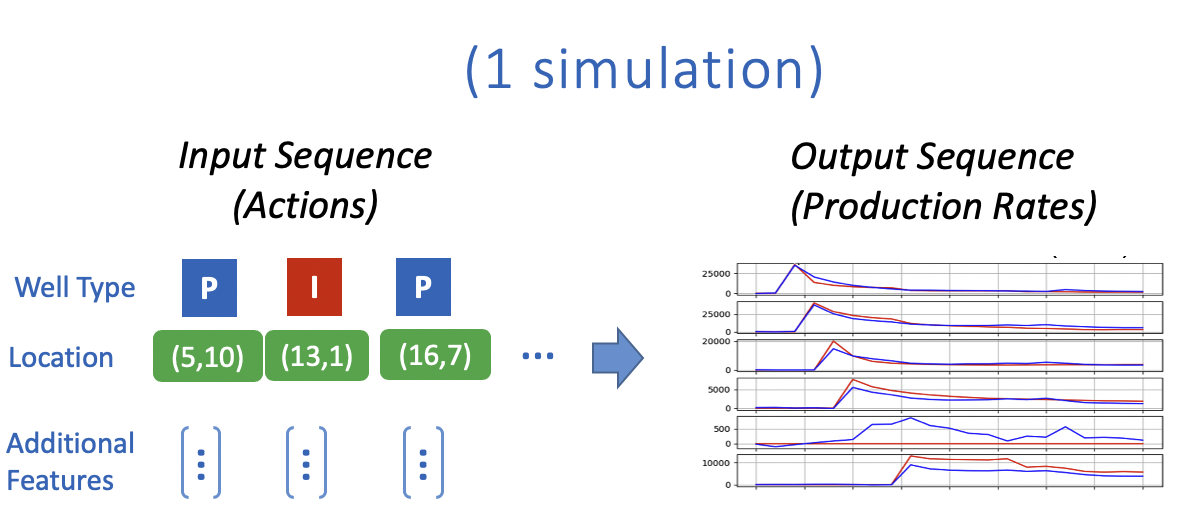


#### 2.2 How the ORSD is partitioned

The intention of this dataset is to cater to researchers across various fields, in particular, to:
* (1) the broader Machine Learning (ML) community, i.e., researchers and data scientists who would like to use the data to validate new (sequential) algorithms, and
* (2) to oil reservoir experts working in the narrower domain who want to examine the simulations and build their work on them. 

Each group may prefer the data in a different form in terms of their relationship to the original task (physics-base simulation). Therefore the data is organized in three *Aspects* as follows:
* **Aspect 1**: Raw pre-simulation data. May be used to re-create actual simulations. **Will be discussed in the next section of this notebook!**
* **Aspect 2**: Raw post-simulation data. May be used by both groups to evaluate the simulation outcomes. **Will be discussed in the next section of this notebook!**
* **Aspect 3**: Post-processed data, including ML features and standardized variables. Easiest data to start ML modeling with. **Will be explored and modeled in *subsequent* notebooks!**

Furthermore, the ORSD splits the simulations into two separate datasets of roughly 30,000 simulations each, namely:
* **SPE9-MAX**: This dataset contains simulations generated by random drilling sequences that distribute uniformly over the entire surface grid of the SPE9 RM (24x25). The aim of the SPE9-MAX is to evaluate a ML model as an *interpolator*, i.e., a predictor of previously unseen sequences drawn from the same distributions as well as the same geological region. The dataset contains 30,000 such simulations partitioned into training, development, and test sets.
* **SPE9-TRIANGLE**: This dataset contains simulations generated by random drilling sequences that distribute uniformly over a **constrained triangular portions of the reservoir surface**. The aim of the SPE9-TRIANGLE is to evaluate a ML model as an *extrapolator*, i.e., a predictor of sequences drawn from a different geological region. This dataset also contains 30,000 such simulations partitioned into training, development, and test sets. An illustration of this partitioning is shown in the following image: 




<a id="cell3"></a>
### 3. Exploring Aspects 1 and 2 of the ORSD

In this section we take a closer look at the data in Aspects 1 and 2 of the ORSD. Let's first however list out all of the files and assets included in this project to get a better sense of what we will be working with. 

In [ ]:
# Extract a sorted list of all assets associated with this project
sorted([d['name'] for d in project.get_assets()])

#### 3.1 Aspect 1 - Simulation schedule files

For each simulation, Aspect 1 includes the individual files that are input to the physics-based simulator (OPM). These files may be helpful to researchers who are interested in re-running the actual physics simulations themselves. They are provided in the format required by the simulator software (`.sch`) and may be accessed by unarchiving either `SPE9-TRIANGLE.Aspect1.tgz` or `SPE9-MAX.Aspect1.tgz`. One such file per simulation is included and labeled by a unique hash code. 

As a sample: lets check out the file `ddddf3a7-a68a-4502-83fc-4e80c4d5fa37.sch` provided with this project. To help us access text files in this notebook however, we first create a function that helps load data assets into memory. 

In [ ]:
# Function to load data asset into notebook
def load_data_asset(data_asset_name):
    """
    Loads a data asset 

    :param data_asset_name: filename of desired text data asset
    :returns: data asset as TextIOWrapper object
    """
    
    r = project.get_file(data_asset_name)
    if isinstance(r, list):
        bio = [ handle['file_content'] for handle in r if handle['data_file_title'] ==  data_asset_name][0]
        bio.seek(0)
        return io.TextIOWrapper(bio, encoding='utf-8')
    else:
        r.seek(0)
        return io.TextIOWrapper(r, encoding='utf-8')

Now we can read in the sample Aspect 1 file. To get a sense for what this file contains, we print a small portion of the file. As you can see from the output of the cell below, the file is structured as a set of parameters that define an oil reservoir model in a manner in which the OPM simulator software can interpret. Parameters are grouped to represent a series of wells to be drilled (input sequence) in the SPE9 RM. The group of parameters printed below represents the first well to be drilled in this simulation. 

In [ ]:
# Read in a sample Aspect 1 data file and preview the top of the file
a1_sample = load_data_asset('ddddf3a7-a68a-4502-83fc-4e80c4d5fa37.sch')
print(a1_sample.read()[:216])

Here are what each of these parameters represent:

* **WELSPECS:** The WELSPECS keyword defines the general well specification data for all well types, and must be used for all wells before any other well specification keywords are used in the input file. The keyword declares the name of the well, the initial group the well belongs to, the wellhead.
* **COMPDAT:** COMPDAT defines how a well is connected to the reservoir by defining or modifying existing well connections.
* **WCONPROD:** The WCONPROD keyword defines production targets and constraints for wells that have previously been defined by the WELSPECS keyword.
* **WECON:** WECON defines the economic criteria for production wells that have previously been defined by the WELSPECS and WCONPROD keywords.
* **TSTEP:** TSTEP keyword advances the simulation to a given report time after which additional keywords may be entered to instruct OPM Flow to perform additional functions via the SCHEDULE section keywords, or further TSTEP keywords may be entered to advance the simulator to the next report time. 

For more information on how to set up a simulation that can be run and solved by the OPM simulator software, check out the latest version of their documentation [here](https://opm-project.org/wp-content/uploads/2020/05/OPM_Flow_Documentation_2020-04_Rev-0.pdf). 

#### 3.2 Aspect 2 - Raw input/output data

Lets now take a look at what data is included in Aspect 2 of the ORSD. Aspect 2 data is essentially a combination of the input and output sequences, as generated by the OPM simulator software, however converted into a JSON format. The benefit of this option (to an ML researcher) is the abstraction from the simulator software and its proprietary binary data formats. In order to use the raw data in an ML experiment, the researcher will need to pre-process and encode the input/output, perform partitioning, etc. Note that Aspect 3 (explored in subsequent notebooks) includes pre-processing.

The inputs are sequences of drilling actions, whereby an action is a tuple `(drill_type, drill_location-x, drill_location-y, drill_control)`. The outputs are sequences of production rates (4-dimensional). The raw data in each of the two datasets consist of 30,000 simulations, each stored in a separate json file named so as to contain the unique hash code consistent with Aspect 1 coding.

The following code cell's output contains a single example of a simulation and its raw form.

In [ ]:
# Read in a sample Aspect 2 data file and preview its contents
a2_sample = load_data_asset('ddddf3a7-a68a-4502-83fc-4e80c4d5fa37.json')
a2_sample = json.load(a2_sample)
list(a2_sample.keys())

Here are what each of the keys represent:

* `action_dict_list`: contains the input sequence of actions. 
* `modification_time`: if and when the data file was last modified, almost always `N/A`.
* `realization_id`: is an integer identifying a geological variant. In the dataset, there is only one geological variant, hence this integer is always `0`.
* `summary_rates`: contains the output sequence of production rates. Note that the outputs are labeled by each individual well and type of well. 
* `unique_label`: is a hash code used to identify this particular simulation in experiments. 

In the following code cell, we dig deeper into `action_dict_list` to peak at how a sample of wells are defined in the input sequence. Note,  a "*producer*" well is a primary recovery well that extracts oil and also gas and water from a reservoir. An "*injector*" well is a secondary recovery well that injects a substance, typically water, into a reservoir in order to sustain the reservoir's pressure as it is depleted. Injector wells can yeild an additional 10-40% oil recovery from the reservoir greatly enhancing the productivity and economics of the development.

In [ ]:
# Peak at a sample "producer" and "injector" well
a2_sample['action_dict_list'][:2]

New features may be engineered upon Aspect 2 of the ORSD. In order to help with this task, `SPE9-geology.h5` and `SPE9-geology.normed.h5` are included with the dataset. These files represent 4-dimensional tensors containing geological features extracted from the SPE9 reservoir model. These features include rock permeability in all three spatial dimensions `(PERMX, PERMY, PERMZ)` and rock porosity `(PORO)`. `SPE9-geology.normed.h5` simply represents a standardized version of the geology data in contrast to `SPE9-geology.h5`. Features created from this data are already included in Aspect 3 and will be explored in subsequent notebooks. For example, at a given drill coordinate (X,Y), the vertical geology (column for all Z, subject to drilling depth) was appended as a feature vector. 

Lets now take some time to visualize the data included in `SPE9-geology.normed.h5`. We begin by creating a function that will take in a slice of the tensor and visualizing the features it represents. 

In [ ]:
def show_SPE9_geology(gamma, title, which_norm=None, dotsize=20):
    """
    Visualizes 3-dimensional geological feature data extracted from the SPE9 reservoir model

    :param gamma: copy of 3-dimensional geology data to visualize
    :param title: title to print for matplotlib graph
    :param which_norm: if/how the data is normalized
    :param dotsize: size to visualize datapoints
    """
    G = gamma.shape
    z = np.arange(G[0])
    y = np.arange(G[1])
    x = np.arange(G[2])
    I0 = cartesian((z, y, x))
    c0 = [gamma[tuple(I0[i])] for i in range(len(I0))]
    plt.rcParams['figure.figsize'] = (10, 8)
    fig = plt.figure()
    plt.clf()
    ax1 = fig.add_subplot(111, projection='3d')
    # set darker background
    plt.gca().patch.set_facecolor('white')
    if which_norm is not None and which_norm == 'log':
        cum_which_norm = matplotlib.colors.LogNorm
    else:
        cum_which_norm = matplotlib.colors.Normalize
    cax = ax1.scatter(I0[:, 0], I0[:, 1], I0[:, 2], c=c0, cmap='inferno', marker='s', s=dotsize, norm=cum_which_norm())
    ax1.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax1.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax1.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    cbar = fig.colorbar(cax)
    plt.title(title)
    plt.show()

Now lets read in the geology tensor stored as an `hdf5` file, and extract all the datasets inside to a Python dictionary.

In [ ]:
# Extract datasets stored in SPE9-geology.normed.h5 to a dictionary
geology = project.get_file('SPE9-geology.normed.h5')
G = {}
with h5.File(geology, 'r') as f:
    for k in f:
        G[k] = f[k].value

Lets peak at the shape of one of the geological features extracted. Notice how the shape matches the grid dimensions of our SPE9 reservoir model.

In [ ]:
G['PORO'].shape

Now lets use our `show_SPE9_geology` function to visualize rock porosity and then rock permeability along the `X` dimension of our model. 

Note that, porosity is a value, from 0 to 1, that represents the fraction of void space inside the rock that is filled with fluids. 0 means this is no space for fluids inside the rock, while 1 means there is no rock at all and the space is purely occupied by fluids. Similarly, X permeability represents how easy is it for the fluids to flow across the rock in the x direction, and is measured in darcy units. 

Notice how rock porosity only varies along the `Z` dimension of our model, while permiability seems to vary across all dimensions of our model. 

In [ ]:
# Rock porosity
show_SPE9_geology(G['PORO'][0], 'PORO', which_norm='log', dotsize=50)

In [ ]:
# Rock permeability along X
show_SPE9_geology(G['PERMX'][0], 'PERMX', which_norm='log', dotsize=50)

#### Next steps
* Close this notebook.
* Open the `Part 2 - Data visualization` notebook to explore Aspect 3 of the ORSD. 

<a id="authors"></a> 
### Authors

This notebook was created by the [Center for Open-Source Data & AI Technologies](http://codait.org).
<br><br>

Copyright © 2020-2021 IBM. This notebook and its source code are released under the terms of the MIT License.
<br><br>
<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>